In [1]:
from dmsp_downloader import read_ssj
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.dates as mdates

event = '2015-09-08'
username = 'First Last'
email = 'name@host.com'
aff = 'University'
sat = 19 # DMSP satellite number
madrigal_kwargs = {'user_fullname' : username, 'user_email' : email, 'user_affiliation' : aff}
read_ssj(event, sat='all', basepath='./', tempfile_path='./', **madrigal_kwargs)

['./20150908_ssj_f16.nc',
 './20150908_ssj_f17.nc',
 './20150908_ssj_f18.nc',
 './20150908_ssj_f19.nc']

### Event date, Space Hurricane

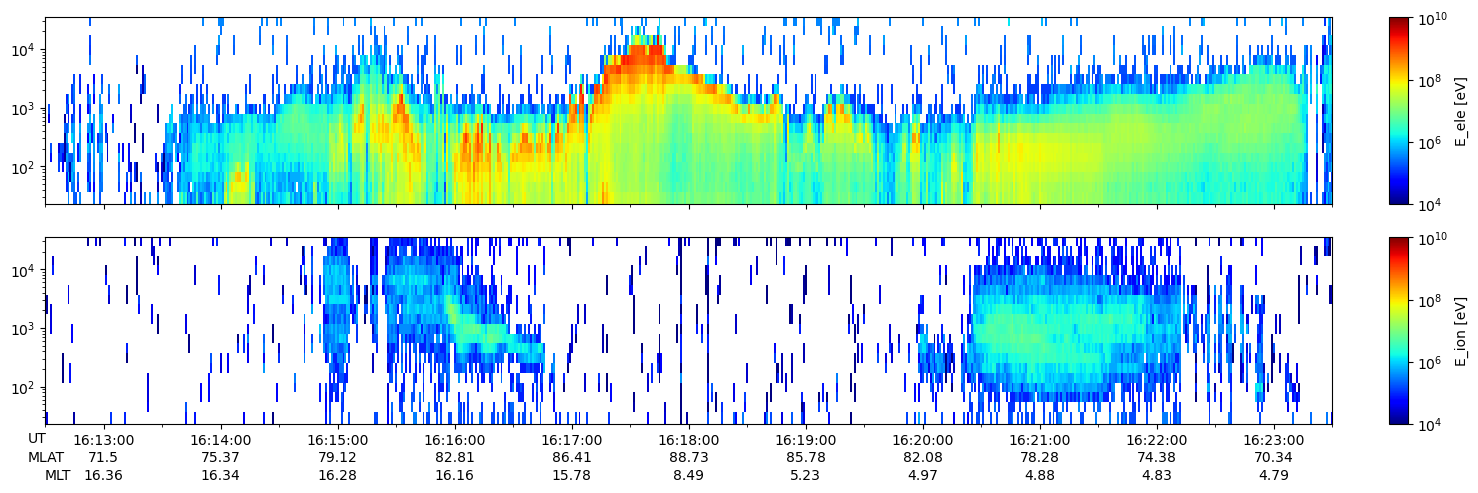

In [2]:
# data = xr.load_dataset('20140820_ssj_f16.nc') ## need to be closed to prevent memory leak
data = xr.open_dataset('20140820_ssj_f16.nc').load() ## no need to close
data['timestamps'] = pd.to_datetime(data['timestamps'].values, unit='s', origin='unix')
sliced_data = data.sel(timestamps=slice('2014-08-20T16:12:30', '2014-08-20T16:23:30'))

fig, (ax,ax1) = plt.subplots(2, 1, figsize=(15, 5))

# Log scale normalization for color mapping
norm = mcolors.LogNorm(vmin=1e4, vmax=1e10)

# Create pcolormesh with logarithmic normalization of data
data_log = sliced_data['el_d_ener'].values
ch_energy = sliced_data['ch_energy'].values
time = sliced_data['timestamps'].values
s = ax.pcolormesh(time , ch_energy, data_log.T, cmap='jet', norm=norm)
ax.set_yscale('log')
ax.set_xlim(time[0], time[-1])
# Add colorbar
cbar = plt.colorbar(s, ax=ax, aspect=10, fraction=0.05, pad=0.04)
cbar.set_label('E_ele [eV]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# Set major ticks locator
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

# Set minor ticks locator
ax.xaxis.set_minor_locator(mdates.SecondLocator(interval=30))
ax.set_xticklabels([])

data_log = sliced_data['ion_d_ener'].values
s = ax1.pcolormesh(time , ch_energy, data_log.T, cmap='jet', norm=norm)
ax1.set_yscale('log')
cbar = plt.colorbar(s, ax=ax1, aspect=10, fraction=0.05, pad=0.04)
cbar.set_label('E_ion [eV]')
ax1.set_xlim(time[0], time[-1])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# Set major ticks locator
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

# Set minor ticks locator
ax1.xaxis.set_minor_locator(mdates.SecondLocator(interval=30))

# Get major tick positions
x_ticks = ax1.get_xticks()
x_tick_labels = [label.get_text() for label in ax1.get_xticklabels()]

## selected data
minutes = sliced_data.timestamps.dt.minute
condition = (minutes % 1 == 0) & (sliced_data.timestamps.dt.second == 0)
indices = np.where(condition)[0]

selected_data = sliced_data.isel(timestamps=indices)
selected_data.glon.values

# Additional labels beneath the x-axis labels
additional_labels = selected_data.mlat.values.round(2).astype('str')
# additional_labels = ['Label1', 'Label2', 'Label3', 'Label4', 'Label5', 'Label6', 'Label7', 'Label8', 'Label9', 'Label10', 'Label11']
first_tick = ax1.get_xticks()[0]
# ax1.text(first_tick - pd.Timedelta(seconds=30), -0.05, 'Single Label', ha='right', transform=ax1.get_xaxis_transform())
ax1.text(x_ticks[0]-0.00045, -0.1, 'UT', ha='left', transform=ax1.get_xaxis_transform())
ax1.text(x_ticks[0]-0.00045, -0.2, 'MLAT', ha='left', transform=ax1.get_xaxis_transform())
for i, label in enumerate(additional_labels):
    ax1.text(x_ticks[i], -0.2, label, ha='center', transform=ax1.get_xaxis_transform())
    
    
additional_labels = selected_data.mlt.values.round(2).astype('str')
# additional_labels = ['Label1', 'Label2', 'Label3', 'Label4', 'Label5', 'Label6', 'Label7', 'Label8', 'Label9', 'Label10', 'Label11']
first_tick = ax1.get_xticks()[0]
# ax1.text(first_tick - pd.Timedelta(seconds=30), -0.05, 'Single Label', ha='right', transform=ax1.get_xaxis_transform())
ax1.text(x_ticks[0]-(x_ticks[1]-x_ticks[0])/2, -0.3, 'MLT', ha='left', transform=ax1.get_xaxis_transform())
for i, label in enumerate(additional_labels):
    ax1.text(x_ticks[i], -0.3, label, ha='center', transform=ax1.get_xaxis_transform())

plt.tight_layout()


### Event date from Lei Cai's paper (https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020JA028808), Figure 9


[Text(16686.56753472222, 0, '13:37:15'), Text(16686.567708333332, 0, '13:37:30'), Text(16686.567881944444, 0, '13:37:45'), Text(16686.568055555555, 0, '13:38:00'), Text(16686.568229166667, 0, '13:38:15'), Text(16686.56840277778, 0, '13:38:30'), Text(16686.56857638889, 0, '13:38:45'), Text(16686.56875, 0, '13:39:00')]


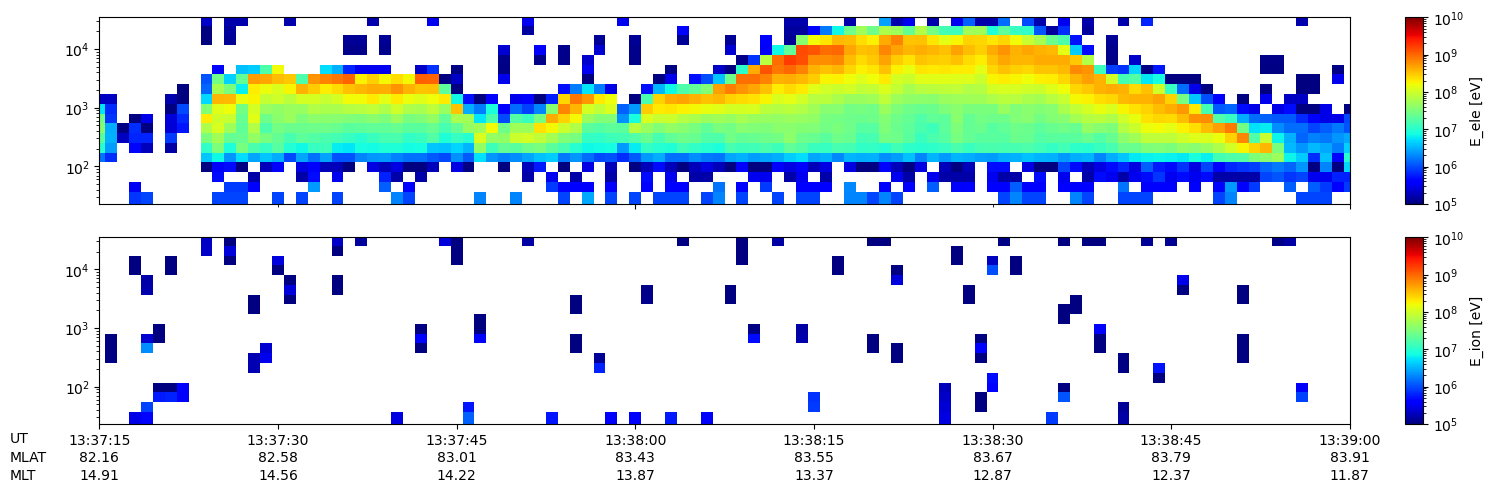

In [3]:

# reading the data 
# data = xr.load_dataset('20150908_ssj_f19.nc') ## need to be closed to prevent memory leak
data = xr.open_dataset('20150908_ssj_f19.nc').load() ## no need to close
data['timestamps'] = pd.to_datetime(data['timestamps'].values, unit='s', origin='unix')
sliced_data = data.sel(timestamps=slice('2015-09-08T13:37:15', '2015-09-08T13:39:00'))
### Graphics
fig, (ax,ax1) = plt.subplots(2, 1, figsize=(15, 5))

# Log scale normalization for color mapping
norm = mcolors.LogNorm(vmin=1e5, vmax=1e10)

# Create pcolormesh with logarithmic normalization of data
data_log = sliced_data['el_d_ener'].values
ch_energy = sliced_data['ch_energy'].values
time = sliced_data['timestamps'].values
s = ax.pcolormesh(time , ch_energy, data_log.T, cmap='jet', norm=norm)
ax.set_yscale('log')
ax.set_xlim(time[0], time[-1])
# Add colorbar
cbar = plt.colorbar(s, ax=ax, aspect=10, fraction=0.05, pad=0.04)
cbar.set_label('E_ele [eV]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# Set major ticks locator
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

# Set minor ticks locator
ax.xaxis.set_minor_locator(mdates.SecondLocator(interval=30))
ax.set_xticklabels([])

data_log = sliced_data['ion_d_ener'].values
s = ax1.pcolormesh(time , ch_energy, data_log.T, cmap='jet', norm=norm)
ax1.set_yscale('log')
cbar = plt.colorbar(s, ax=ax1, aspect=10, fraction=0.05, pad=0.04)
cbar.set_label('E_ion [eV]')
ax1.set_xlim(time[0], time[-1])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# Set major ticks locator
ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=15))


x= ax1.get_xmajorticklabels()
print(x)
# Set minor ticks locator
ax1.xaxis.set_minor_locator(mdates.SecondLocator(interval=15))

# Get major tick positions
x_ticks = ax1.get_xticks()
x_tick_labels = [label.get_text() for label in ax1.get_xticklabels()]

###
minutes = sliced_data.timestamps.dt.second
condition = (minutes % 15 == 0)
indices = np.where(condition)[0]

selected_data = sliced_data.isel(timestamps=indices)


# Additional labels beneath the x-axis labels
additional_labels = selected_data.mlat.values.round(2).astype('str')
# additional_labels = ['Label1', 'Label2', 'Label3', 'Label4', 'Label5', 'Label6', 'Label7', 'Label8', 'Label9', 'Label10', 'Label11']
first_tick = ax1.get_xticks()[0]
# ax1.text(first_tick - pd.Timedelta(seconds=30), -0.05, 'Single Label', ha='right', transform=ax1.get_xaxis_transform())
ax1.text(x_ticks[0]-(x_ticks[1]-x_ticks[0])/2, -0.1, 'UT', ha='left', transform=ax1.get_xaxis_transform())
ax1.text(x_ticks[0]-(x_ticks[1]-x_ticks[0])/2, -0.2, 'MLAT', ha='left', transform=ax1.get_xaxis_transform())
for i, label in enumerate(additional_labels):
    ax1.text(x_ticks[i], -0.2, label, ha='center', transform=ax1.get_xaxis_transform())
    
    
additional_labels = selected_data.mlt.values.round(2).astype('str')
# additional_labels = ['Label1', 'Label2', 'Label3', 'Label4', 'Label5', 'Label6', 'Label7', 'Label8', 'Label9', 'Label10', 'Label11']
first_tick = ax1.get_xticks()[0]
# ax1.text(first_tick - pd.Timedelta(seconds=30), -0.05, 'Single Label', ha='right', transform=ax1.get_xaxis_transform())
ax1.text(x_ticks[0]-(x_ticks[1]-x_ticks[0])/2, -0.3, 'MLT', ha='left', transform=ax1.get_xaxis_transform())
for i, label in enumerate(additional_labels):
    ax1.text(x_ticks[i], -0.3, label, ha='center', transform=ax1.get_xaxis_transform())

plt.tight_layout()
